## Transformed and Derived Variables

We frequently need to transform and derive new variables because of 
- Observations from our graphical analysis
- Necessary changes to make the modeling more effective
- Changes to make the analytics more efficient

In [80]:
# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from collections import Counter
import json
from sklearn.preprocessing import StandardScaler

# Statistics
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

# Check for errors

## Load the accident data

In [81]:
# Read the JSON file
# Make the keys integers again

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'TrainNarratives.txt'


with open(path + file) as json_file:  
    Narrative_dict = json.load(json_file)
    
str_index = [int(x) for x in Narrative_dict.keys()]

Narrative_dict = dict(zip(str_index, Narrative_dict.values()))


In [82]:
# Load the train accident data

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'FullCleanedAdrian.csv'

accidents_df = pd.read_csv(path + file, low_memory = False)

accidents_df.shape

# Putting Narrative back into the dataframe

accidents_df['Narrative'] = Narrative_dict.values()

accidents_df.shape

(38167, 89)

## In-Class Exercise 1

Look at the variable CAUSE. How can we create a variable that will be more efficient for our analysis (i.e., has fewer categories)?

## In-Class Exercise 1 Answers

Youc can create a variable that will be more efficient for your analysis (ie: have fewer categories), by taking just the first letter to be a new column.

In [83]:
accidents_df.CAUSE

0        T108
1        E79L
2        E79L
3        H303
4        M404
5        E79L
6        H018
7        M599
8        T399
9        T319
10       H302
11       H599
12       M402
13       T220
14       M204
15       M405
16       H018
17       H699
18       E21C
19       T221
20       T311
21       H302
22       E53C
23       T221
24       E09C
25       T203
26       H702
27       M504
28       H306
29       H306
         ... 
38137    H999
38138    H018
38139    T404
38140    M505
38141    H306
38142    T311
38143    M599
38144    T207
38145    H305
38146    H997
38147    H702
38148    E68C
38149    T110
38150    H522
38151    H702
38152    E33C
38153    M501
38154    H221
38155    E53C
38156    M402
38157    T202
38158    H017
38159    H307
38160    T311
38161    H704
38162    M502
38163    H099
38164    S007
38165    H306
38166    T109
Name: CAUSE, Length: 38167, dtype: object

In [84]:
accidents_df['MajorCause'] = accidents_df['CAUSE'].apply(lambda x: x[0])

In [85]:
accidents_df.MajorCause.value_counts()

H    14345
T    12685
M     5478
E     4839
S      820
Name: MajorCause, dtype: int64

## In-Class Exercise 2

Create a new variable, Casualties, that is the sum of total killed and total injured and add it to the dataframe. Look at the summary statistics of this variable and comment on what they mean.

## In-Class Exercise 2 Answers

After looking at the summary statistics for the Casualties variable, you can see that this is a highly skewed variable to the right. That is, it's very unusual for their to be any casualties whatsoever. The mean is 0.12 and the 75th %-ile is still 0.

In [86]:
accidents_df['Casualties'] = accidents_df['TOTKLD']+accidents_df['TOTINJ']

In [87]:
accidents_df['Casualties'].describe()

count    38167.000000
mean         0.123353
std          5.951747
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1001.000000
Name: Casualties, dtype: float64

## Visualizing by aggregating and grouping data with the derived variables.

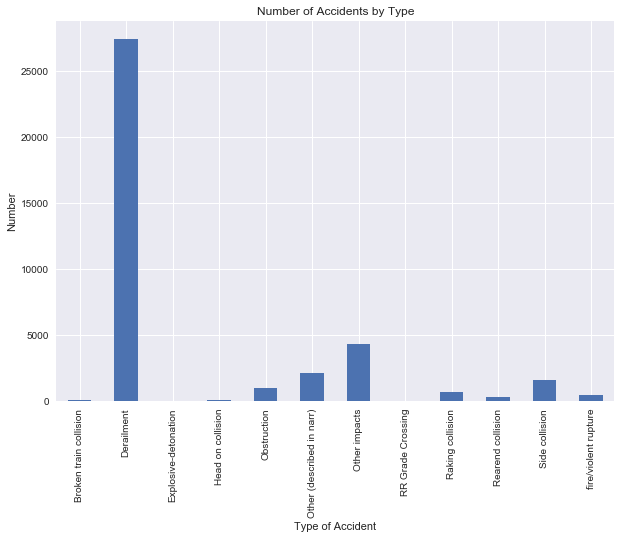

In [88]:
# Grouping to plot the number of accidents by accident type

plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['TYPE']).size().plot(kind ='bar')
cost_type.set_title("Number of Accidents by Type")
cost_type.set_ylabel("Number")
cost_type.set_xlabel("Type of Accident")

## In-Class Exercise 3

Use grouping to plot

- The total cost of accidents by accident type
- The total number of casualties by accident type
- The number of accidents by major cause (new derived variable)
- The cost of accidents by major cause
- The number of casualties by major cause

## In-Class Exercise 3 Answers

Done Below for all 5 plots

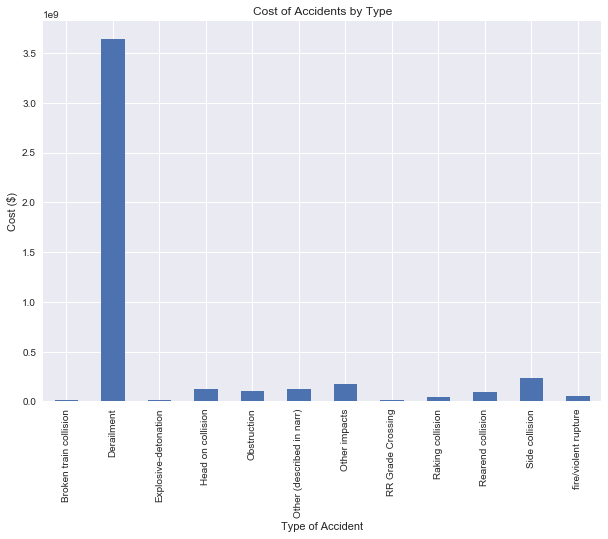

In [89]:
# - The total cost of accidents by accident type
plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['TYPE']).sum().plot(kind ='bar')
cost_type.set_title("Cost of Accidents by Type")
cost_type.set_ylabel("Cost ($)")
cost_type.set_xlabel("Type of Accident")

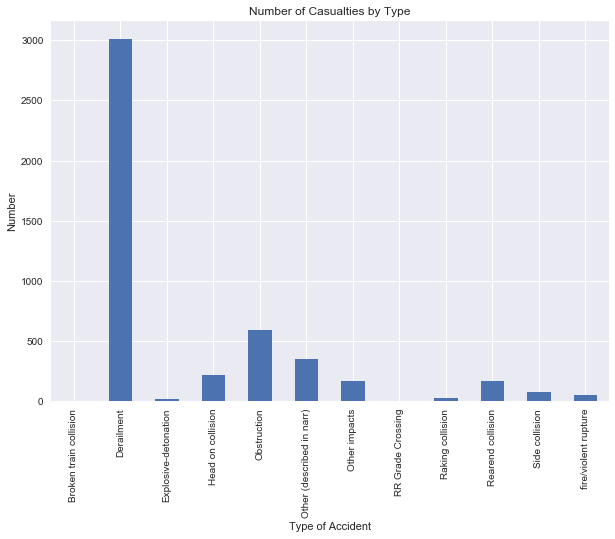

In [90]:
# - The total number of casualties by accident type
plt.figure(figsize=(10, 7))

casualty_type =accidents_df['Casualties'].groupby(accidents_df['TYPE']).sum().plot(kind ='bar')
casualty_type.set_title("Number of Casualties by Type")
casualty_type.set_ylabel("Number")
casualty_type.set_xlabel("Type of Accident")

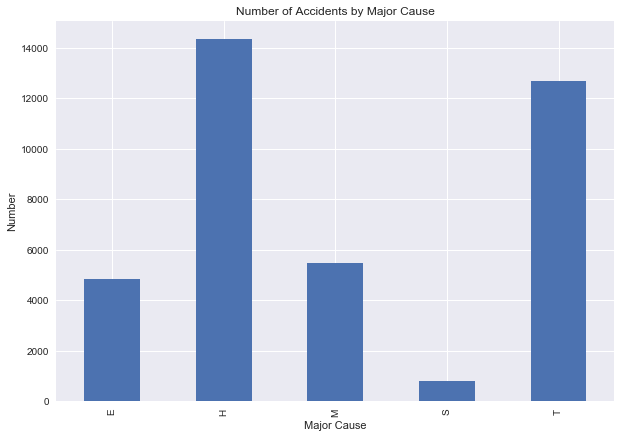

In [91]:
# - The number of accidents by major cause (new derived variable)
plt.figure(figsize=(10, 7))

cost_cause =accidents_df['ACCDMG'].groupby(accidents_df['MajorCause']).size().plot(kind ='bar')
cost_cause.set_title("Number of Accidents by Major Cause")
cost_cause.set_ylabel("Number")
cost_cause.set_xlabel("Major Cause")

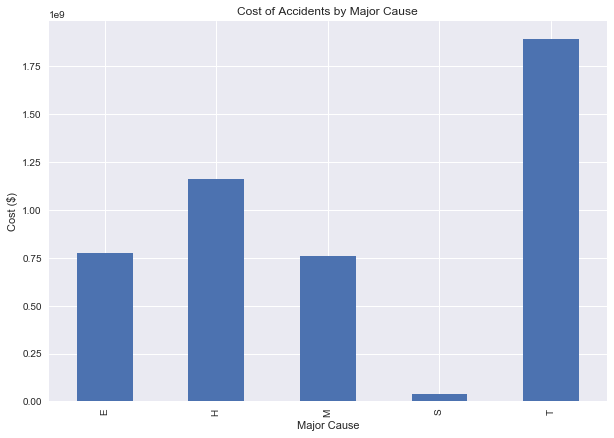

In [92]:
# - The cost of accidents by major cause
plt.figure(figsize=(10, 7))

cost_type =accidents_df['ACCDMG'].groupby(accidents_df['MajorCause']).sum().plot(kind ='bar')
cost_type.set_title("Cost of Accidents by Major Cause")
cost_type.set_ylabel("Cost ($)")
cost_type.set_xlabel("Major Cause")

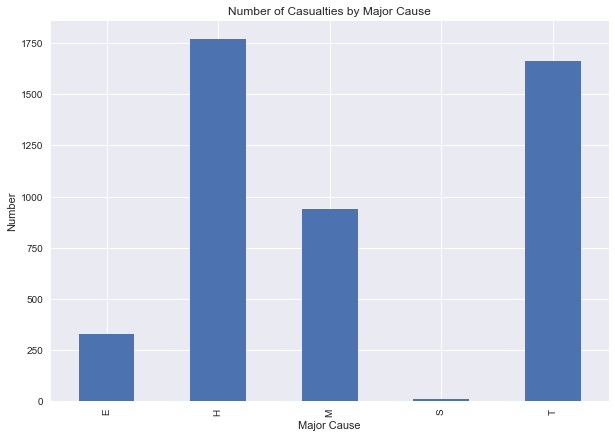

In [93]:
# - The number of casualties by major cause
plt.figure(figsize=(10, 7))

casualty_cause =accidents_df['Casualties'].groupby(accidents_df['MajorCause']).sum().plot(kind ='bar')
casualty_cause.set_title("Number of Casualties by Major Cause")
casualty_cause.set_ylabel("Number")
casualty_cause.set_xlabel("Major Cause")

## In-Class Exercise 4

Look at a distributional plot (box plots) of accident cost vs. accident type and another plot vs. major cause. What transformation does this plot suggest? Make the transformation to create a new variable in the dataframe and plot again.

## In-Class Exercise 4 Answer

Because of the large amount of skewness in the Accident Cost data (across all types of Accidents and across MajorCauses), it seems like a good transformation to perform would be logarithm. This transformation seems to do a fairly good job normalizing the shape of the accdmg data. In particular the two graphs, log(ACCDMG) vs. TYPE and vs. MajorCause look significantly better.

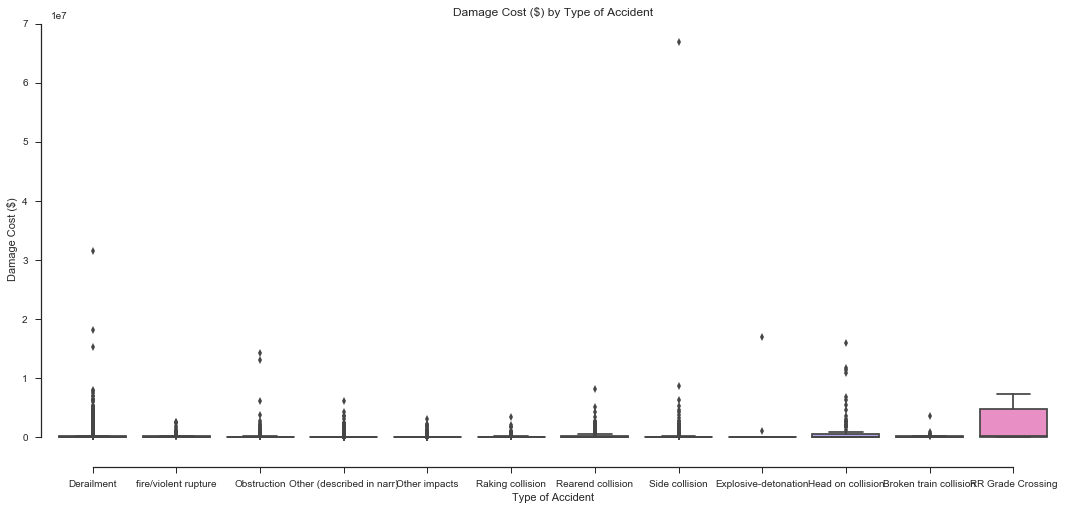

In [94]:
# - We did a boxplot of ACCDMG vs Type
sns.set(style='ticks')
# Going to use Seaborn
plt.figure(figsize=(18,8))

accdmg_bp = sns.boxplot(x="TYPE", y="ACCDMG", data=accidents_df)
sns.despine(offset = 10, trim = True)
accdmg_bp.set_title("Damage Cost ($) by Type of Accident")
accdmg_bp.set_ylabel("Damage Cost ($)")
accdmg_bp.set_xlabel("Type of Accident")

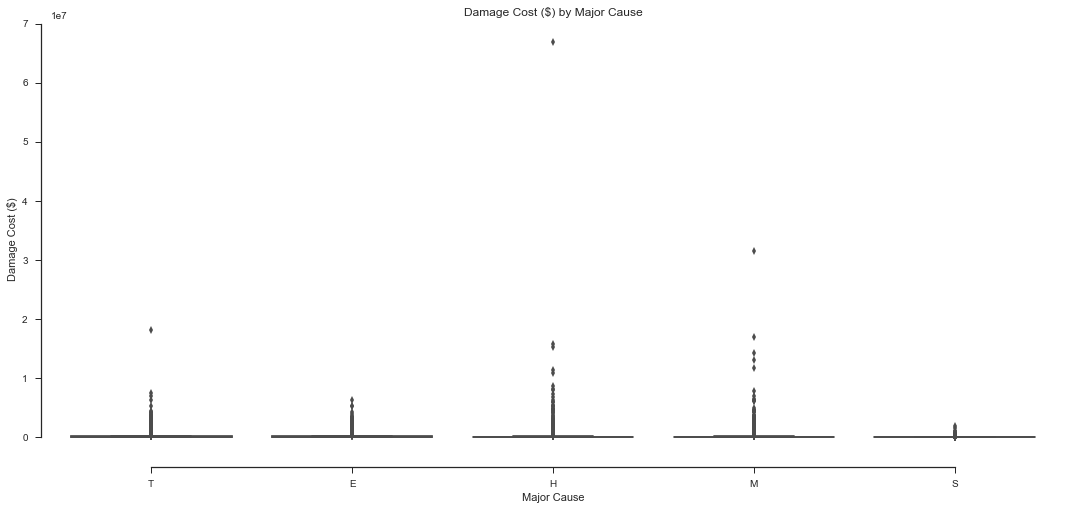

In [95]:
# - We did a boxplot of ACCDMG vs MajorCause
sns.set(style='ticks')
# Going to use Seaborn
plt.figure(figsize=(18,8))

accdmg_bp = sns.boxplot(x="MajorCause", y="ACCDMG", data=accidents_df)
sns.despine(offset = 10, trim = True)
accdmg_bp.set_title("Damage Cost ($) by Major Cause")
accdmg_bp.set_ylabel("Damage Cost ($)")
accdmg_bp.set_xlabel("Major Cause")

In [96]:
# Applying the logarithm transformation. Add '1' so that you don't take log(0) which is undefined
accidents_df['LogACCDMG'] = sp.log(accidents_df['ACCDMG'] + 1)

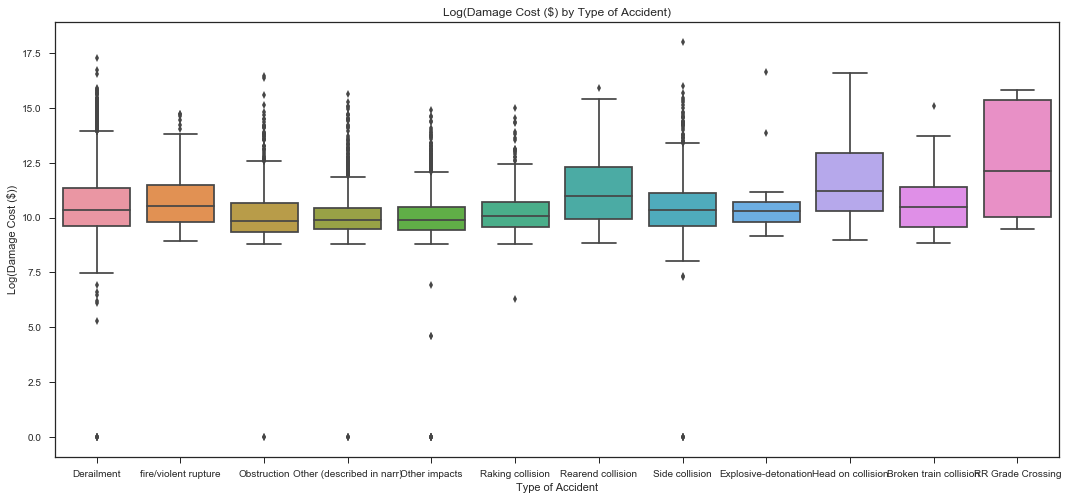

In [97]:
plt.figure(figsize=(18,8))

logaccdmg_bp = sns.boxplot(x="TYPE", y="LogACCDMG", data=accidents_df)
logaccdmg_bp.set_title("Log(Damage Cost ($) by Type of Accident)")
logaccdmg_bp.set_ylabel("Log(Damage Cost ($))")
logaccdmg_bp.set_xlabel("Type of Accident")

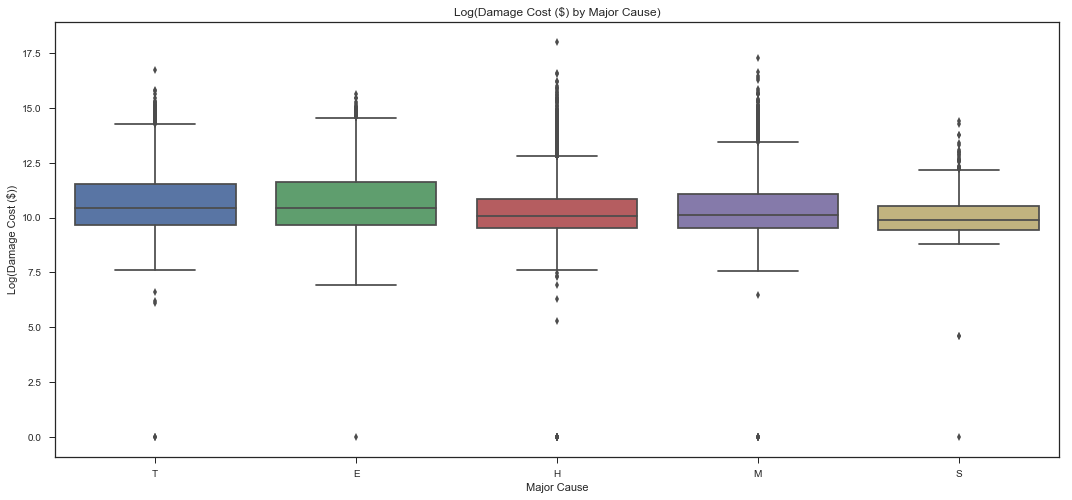

In [98]:
plt.figure(figsize=(18,8))

logaccdmg_bp = sns.boxplot(x="MajorCause", y="LogACCDMG", data=accidents_df)
logaccdmg_bp.set_title("Log(Damage Cost ($) by Major Cause)")
logaccdmg_bp.set_ylabel("Log(Damage Cost ($))")
logaccdmg_bp.set_xlabel("Major Cause")

## In-Class Exercise 5

Look at a distributional plot (box plots) of Casualties vs. accident type and another plot vs. major cause. Does this plot suggest a similar transformation as you did for ACCDMG? Make the transformation to create a new variable in the dataframe and plot again. Comment on what your observe.

## In-Class Exercise 5 Answers

It looks like the plot Casualties vs. Accident Type and vs. Major Cause experience a skewness quite similar to the Accident Damage above (fewer large-outcome events). This does imply that we should use a similar transformation as we did in Exercise 4: logarithm.

However, when we make the transformation the outcome is significantly different; you can see that we didn't get rid of the skewness at all. The problem is that Casualties is very different data from ACCDMG. ACCDMG is much closer to continuous; Casualties is much more discrete. Our transformation itself doesn't even make much sense (adding a 1/10th of a person is a bit non-sensical)

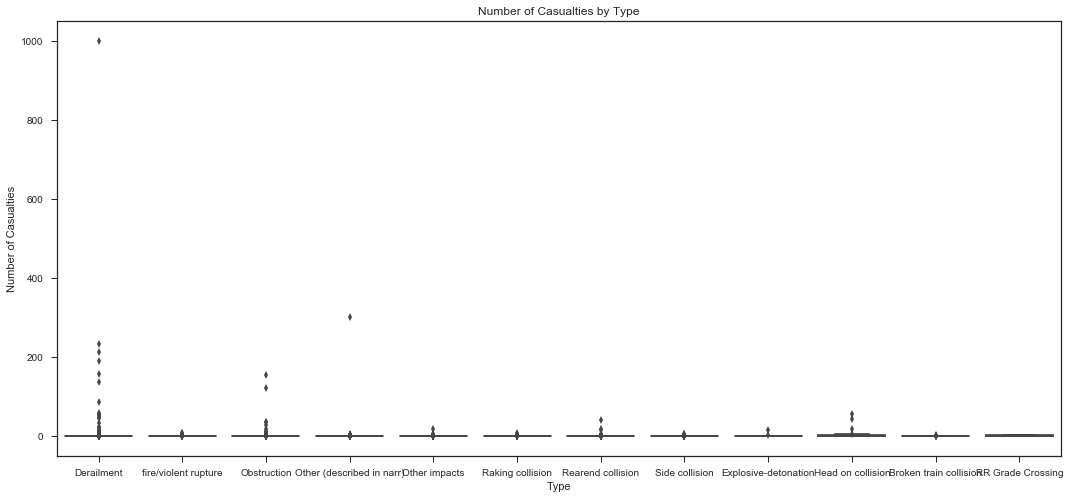

In [99]:
plt.figure(figsize=(18,8))

casualites_bp = sns.boxplot(x="TYPE", y="Casualties", data=accidents_df)
casualites_bp.set_title("Number of Casualties by Type")
casualites_bp.set_ylabel("Number of Casualties")
casualites_bp.set_xlabel("Type")

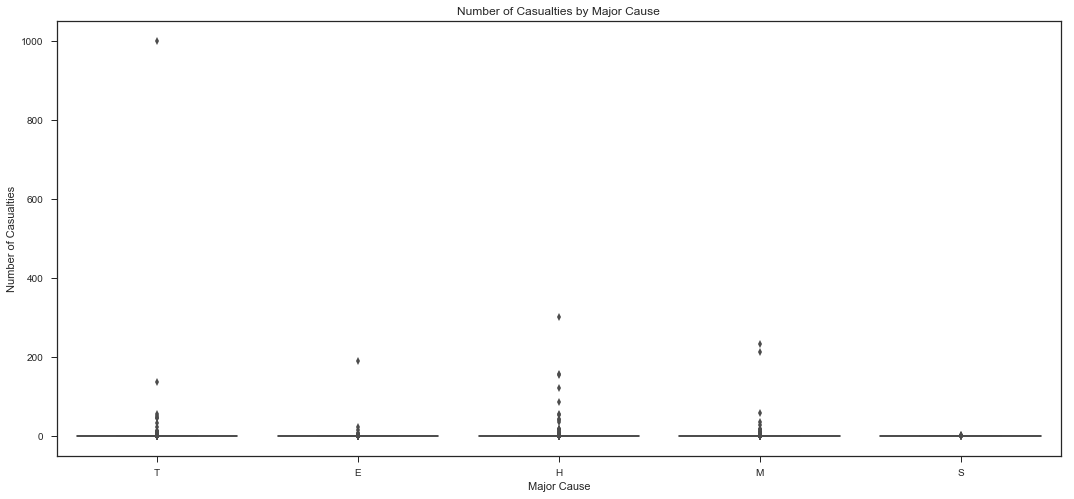

In [100]:
plt.figure(figsize=(18,8))

casualites_bp = sns.boxplot(x="MajorCause", y="Casualties", data=accidents_df)
casualites_bp.set_title("Number of Casualties by Major Cause")
casualites_bp.set_ylabel("Number of Casualties")
casualites_bp.set_xlabel("Major Cause")

In [101]:
# We only add .1 because the range of casualty outcomes is significantly smaller than the range of ACCDMG outcomes
# We only want to make a small change to the original data so as to avoid biasing it it much
accidents_df['LogCasualties'] = sp.log(accidents_df['Casualties'] + .1)

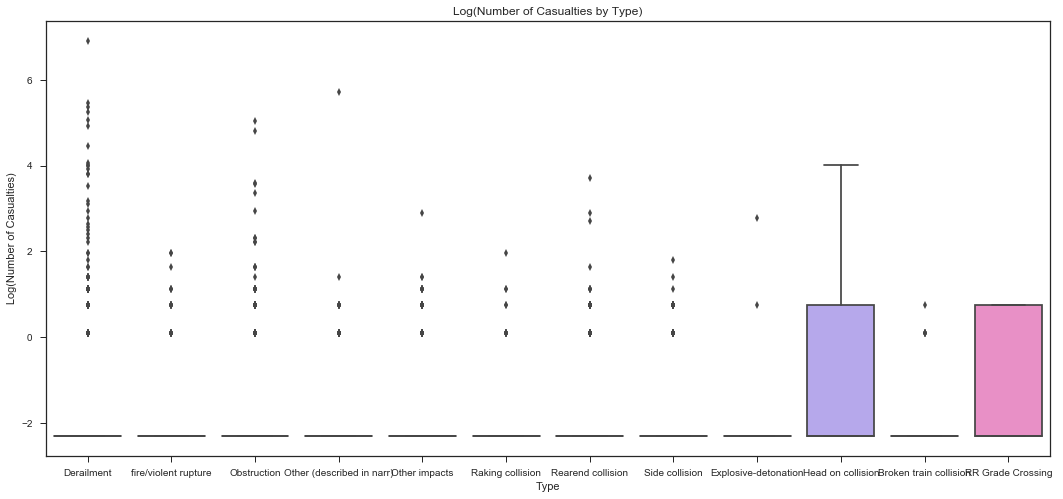

In [102]:
plt.figure(figsize=(18,8))

logcasualties_bp = sns.boxplot(x="TYPE", y="LogCasualties", data=accidents_df)
logcasualties_bp.set_title("Log(Number of Casualties by Type)")
logcasualties_bp.set_ylabel("Log(Number of Casualties)")
logcasualties_bp.set_xlabel("Type")

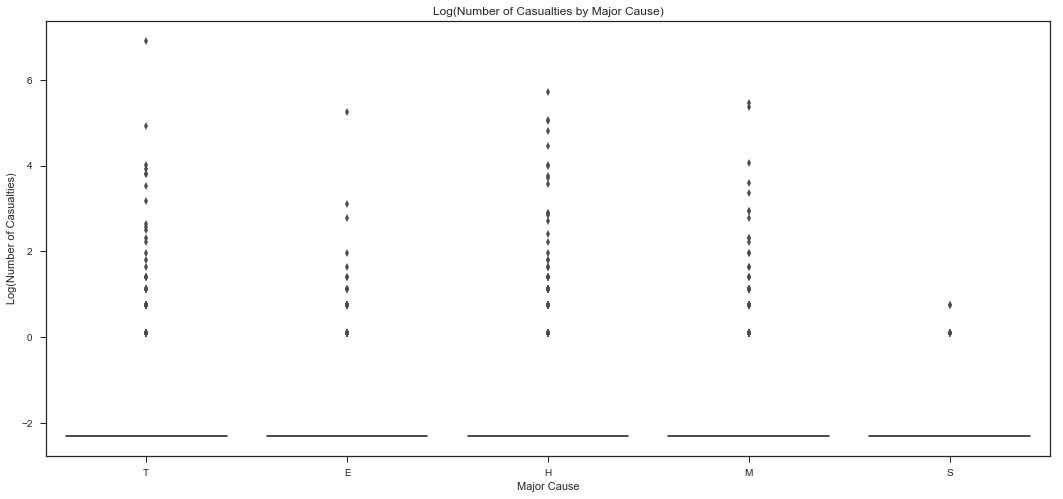

In [103]:
plt.figure(figsize=(18,8))

logcasualties_bp = sns.boxplot(x="MajorCause", y="LogCasualties", data=accidents_df)
logcasualties_bp.set_title("Log(Number of Casualties by Major Cause)")
logcasualties_bp.set_ylabel("Log(Number of Casualties)")
logcasualties_bp.set_xlabel("Major Cause")

## In-Class Exercise 6 

Look at box plots of TRNSPD and TONS. What transformation is suggested? Make the transformation and replot.

## In-Class Exercise 6  Answers

The boxplots of TRNSPD and TONS look pretty similar shape-wise, however their scales are pretty different (trains speed is 0 to 140 and tonnage is 0 to 1 million). So the transformation that makes the most sense is going to be scaling by the standard deviation and mean (z = (x-x_bar)/sd_x), so that we can actually compare a train speed to a tonnage.

After the transformation we can see that TRNSPD and TONS are scaled the same now and can be compared to one another more readily.

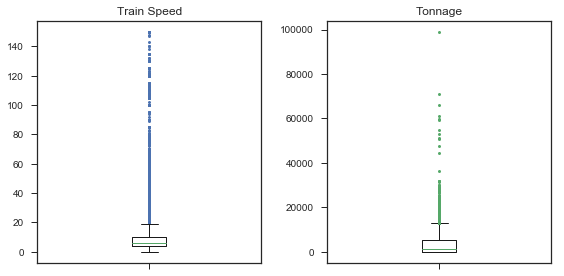

In [104]:
# Compare TRNSPD and TONS
fig, (box1, box2) = plt.subplots(ncols = 2, figsize = (8, 4))

# TRNSPD boxplot
box1.boxplot("TRNSPD", data=accidents_df, sym = 'b.')
box1.set_title("Train Speed")
box1.set_xticklabels("")
# TONS boxplot
box2.boxplot("TONS", data=accidents_df, sym = 'g.')
box2.set_title("Tonnage")
box2.set_xticklabels("")

# And display the plots
fig.tight_layout()

In [105]:
# Making the transformation
# sklearn has a method, StandardScaler, (similar to TransformerMixin as it also has a function, fit_transform),
# which we can create and use on the TRNSPD and TONS columns
scaler = StandardScaler()

# Scale the columns
accidents_df[['TRNSPDscaled', 'TONSscaled']] = pd.DataFrame(scaler.fit_transform(accidents_df[['TRNSPD', 'TONS']]))
accidents_df[['TRNSPDscaled', 'TONSscaled']].describe()
# Now when you look, the mean is 0 and the std deviation is 1. As we expect

,TRNSPDscaled,TONSscaled
count,3.816700e+04,3.816700e+04
mean,2.934569e-15,-1.467224e-15
std,1.000013e+00,1.000013e+00
min,-7.255309e-01,-7.038866e-01
25%,-4.513477e-01,-7.038866e-01
50%,-3.142561e-01,-4.719605e-01
75%,-4.007290e-02,3.918075e-01
max,9.556339e+00,1.998141e+01


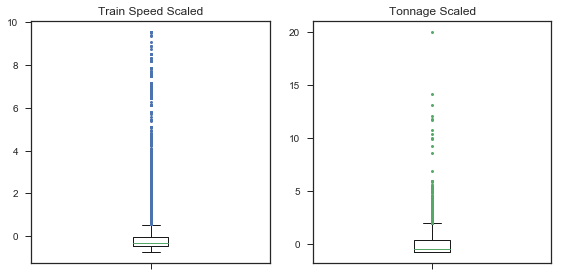

In [106]:
# Compare TRNSPD and TONS
fig, (box1, box2) = plt.subplots(ncols = 2, figsize = (8, 4))

# TRNSPD boxplot
box1.boxplot("TRNSPDscaled", data=accidents_df, sym = 'b.')
box1.set_title("Train Speed Scaled")
box1.set_xticklabels("")
# TONS boxplot
box2.boxplot("TONSscaled", data=accidents_df, sym = 'g.')
box2.set_title("Tonnage Scaled")
box2.set_xticklabels("")

# And display the plots
fig.tight_layout()

In [115]:
# Drop the Narrative column before saving
#accidents_df.drop(['Narrative'], axis = 1).to_csv('/Users/mead/Fall2017/DonBrown-DS6001/InClass1/FullCleanedAdrianWithNewColumns.csv')